In [ ]:
import keras
from keras import layers

In [2]:
encoding_dims = 32

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dims, activation="relu")(input_img)
decoded = layers.Dense(784, activation="sigmoid")(encoded)

autoencoder = keras.Model(input_img, decoded)

In [3]:
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dims,))
decoded_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoded_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [5]:
from keras.datasets import mnist
import numpy as np

In [6]:
(x_train,_),(x_test,_) = mnist.load_data()

In [7]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [8]:
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=256,
    validation_data=(x_test, x_test)
)

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.2742 - val_loss: 0.1853
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1670 - val_loss: 0.1500
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1421 - val_loss: 0.1326
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1279 - val_loss: 0.1209
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1180 - val_loss: 0.1127
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1110 - val_loss: 0.1068
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1060 - val_loss: 0.1023
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1021 - val_loss: 0.0991
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0993 - val_loss: 0.0968
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0975 - val_loss: 0.0953

In [10]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


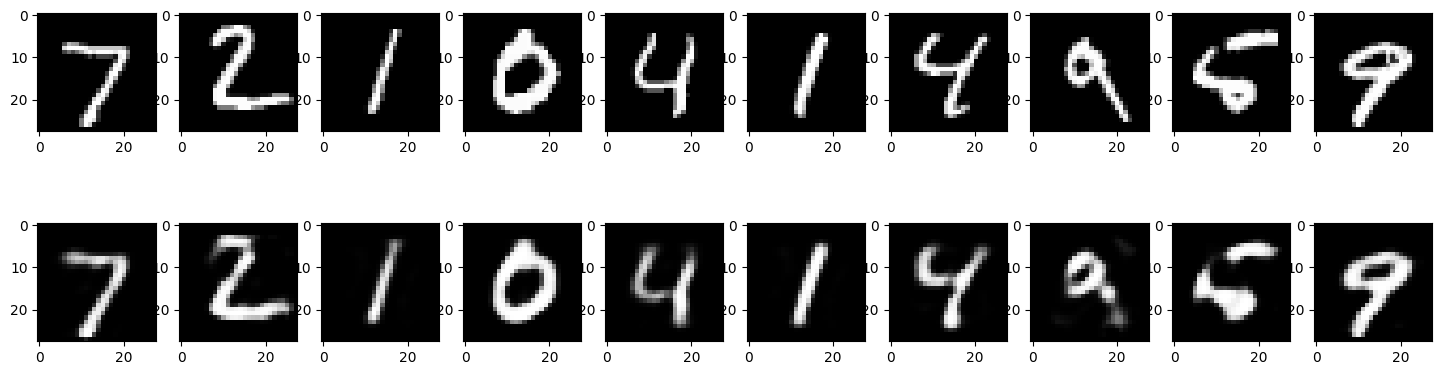

In [12]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(18,5))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()

plt.show()
